# **Package Imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df_original = pd.read_csv("Oxygen_Dataset.csv")
df_original

,age,gender,spo2,pr,c/nc,oxy_flow
0,57,1,98.0,62.0,0.0,0.0
1,52,1,98.0,79.0,0.0,0.0
2,67,0,97.0,84.0,0.0,0.0
3,47,1,99.0,62.0,0.0,0.0
4,86,0,93.0,78.0,0.0,0.0
5,65,0,NaN,NaN,NaN,NaN
6,55,0,99.0,84.0,1.0,0.0
7,48,0,99.0,72.0,0.0,0.0
8,58,0,95.0,90.0,0.0,0.0
9,91,0,98.0,78.0,1.0,0.0


In [ ]:
df_original.head()

,age,gender,spo2,pr,c/nc,oxy_flow
0,57,1,98.0,62.0,0.0,0.0
1,52,1,98.0,79.0,0.0,0.0
2,67,0,97.0,84.0,0.0,0.0
3,47,1,99.0,62.0,0.0,0.0
4,86,0,93.0,78.0,0.0,0.0


In [ ]:
df_original.describe()

,age,gender,spo2,pr,c/nc,oxy_flow
count,30.000000,30.000000,29.000000,29.000000,29.000000,28.000000
mean,62.266667,0.300000,80.206897,78.482759,0.689655,13.785714
std,17.614519,0.466092,20.293171,15.298508,0.470824,21.366913
min,17.000000,0.000000,35.000000,40.000000,0.000000,0.000000
25%,51.000000,0.000000,70.000000,72.000000,0.000000,0.000000
50%,60.500000,0.000000,90.000000,78.000000,1.000000,5.000000
75%,74.500000,1.000000,97.000000,90.000000,1.000000,20.000000
max,100.000000,1.000000,99.000000,110.000000,1.000000,76.000000


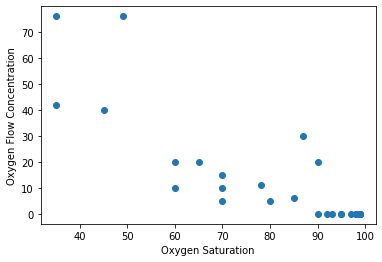

In [ ]:
plt.scatter(x = df_original.spo2, y = df_original.oxy_flow)
plt.xlabel("Oxygen Saturation")
plt.ylabel("Oxygen Flow Concentration")
plt.show()

## **Data Cleaning and Feature Engineering**

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       30 non-null     int64  
 1   gender    30 non-null     int64  
 2   spo2      29 non-null     float64
 3   pr        29 non-null     float64
 4   c/nc      29 non-null     float64
 5   oxy_flow  28 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.5 KB


In [ ]:
df_original.isnull().sum()

age         0
gender      0
spo2        1
pr          1
c/nc        1
oxy_flow    2
dtype: int64

In [ ]:
df_original.mean()
df = df_original.fillna(df_original.mean())
df["c/nc"].fillna(method ='ffill', limit = 1, inplace = True)

In [ ]:
df

,age,gender,spo2,pr,c/nc,oxy_flow
0,57,1,98.000000,62.000000,0.000000,0.000000
1,52,1,98.000000,79.000000,0.000000,0.000000
2,67,0,97.000000,84.000000,0.000000,0.000000
3,47,1,99.000000,62.000000,0.000000,0.000000
4,86,0,93.000000,78.000000,0.000000,0.000000
5,65,0,80.206897,78.482759,0.689655,13.785714
6,55,0,99.000000,84.000000,1.000000,0.000000
7,48,0,99.000000,72.000000,0.000000,0.000000
8,58,0,95.000000,90.000000,0.000000,0.000000
9,91,0,98.000000,78.000000,1.000000,0.000000


# **Dataset Splitting**

In [ ]:
# Data is split into features and target variables

x = df.drop(["oxy_flow"], axis=1)
y = df.drop(df.loc[:, 'age':'c/nc'].columns, axis=1)

In [ ]:
print(x)

    age  gender       spo2          pr      c/nc
0    57       1  98.000000   62.000000  0.000000
1    52       1  98.000000   79.000000  0.000000
2    67       0  97.000000   84.000000  0.000000
3    47       1  99.000000   62.000000  0.000000
4    86       0  93.000000   78.000000  0.000000
5    65       0  80.206897   78.482759  0.689655
6    55       0  99.000000   84.000000  1.000000
7    48       0  99.000000   72.000000  0.000000
8    58       0  95.000000   90.000000  0.000000
9    91       0  98.000000   78.000000  1.000000
10   82       0  95.000000   73.000000  1.000000
11   73       1  92.000000   74.000000  1.000000
12   45       1  49.000000   75.000000  1.000000
13   51       0  87.000000   95.000000  1.000000
14   75       0  90.000000   95.000000  1.000000
15   67       1  95.000000   75.000000  1.000000
16   51       0  70.000000   77.000000  1.000000
17   50       0  60.000000   79.000000  1.000000
18   60       0  80.000000  110.000000  1.000000
19   52       1  70.

In [ ]:
# train test splitting the data for initiating the learning procedure
# splitting the data into 80:20 ratio for train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

# **Using Decision Tree Regression model for learning**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=55)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=55)

In [ ]:
y_pred_dtr = dtr.predict(x_test)

# **Error Analysis**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_dtr))

12.362577940435132

In [ ]:
y_pred_dtr

array([ 0., 20.,  6.,  0., 11., 20.])

# **The Prediction Time**

In [ ]:
dtr.predict([[65, 0, 49, 76, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([40.])